In [17]:
import earthaccess
import rioxarray
import rasterio
import xarray as xr
import numpy as np
from timebudget import timebudget

In [18]:
results = earthaccess.search_data(
    short_name="MUR-JPL-L4-GLOB-v4.1",
    temporal=("2020-01-01", "2021-12-31"),
)


Granules found: 729


 Opening 729 granules, approx size: 505.34 GB


QUEUEING TASKS | : 0it [00:00, ?it/s]

PROCESSING TASKS | :   0%|          | 0/729 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/729 [00:00<?, ?it/s]

CPU times: user 4min 27s, sys: 57.7 s, total: 5min 25s
Wall time: 1h 14min 1s


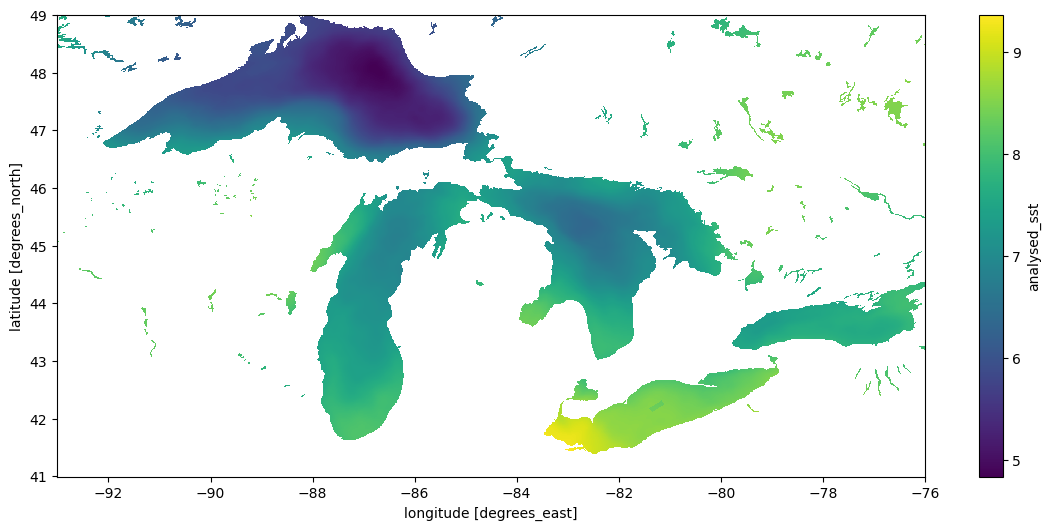

In [19]:
%%time

files = earthaccess.open(results)
ds = xr.open_mfdataset(files,
                     decode_times=False, 
                     data_vars=['analysed_sst', 'sea_ice_fraction'], 
                     concat_dim="time", 
                     combine="nested",
                     parallel=True)

dds = ds.sel(lon=slice(-93, -76), lat=slice(41, 49))
cond = (dds.sea_ice_fraction < 0.15) | np.isnan(dds.sea_ice_fraction)
result = dds.analysed_sst.where(cond)
result.std("time").plot(figsize=(14, 6), x="lon", y="lat")